In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = {'auction_type_id':'object', 'country': np.float32, 'date': 'object', 'device_id': np.float32, 'platform' :'category', 'ref_type_id':'category', 'source_id':'category'})

In [3]:
del auctions['country']

In [4]:
del auctions['auction_type_id']

In [5]:
auctions.loc[:,'date'] = pd.to_datetime(auctions['date'], errors = 'coerce')

In [6]:
auctions_reduced = auctions[['device_id', 'platform']]

In [7]:
platform1 = auctions_reduced[auctions_reduced['platform'] == '1']
platform2 = auctions_reduced[auctions_reduced['platform'] == '2']

In [8]:
platform1['device_id'].value_counts().count()

159614

In [9]:
platform2['device_id'].value_counts().count()

46839

<Container object of 2 artists>

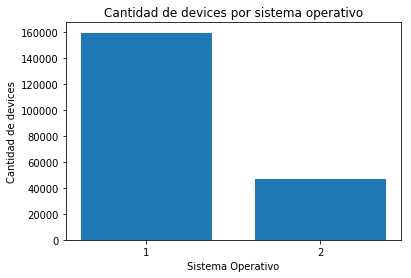

In [10]:
x = [1, 1.4]
height = [platform1['device_id'].value_counts().count(), platform2['device_id'].value_counts().count()]
width = 0.3
plt.title('Cantidad de devices por sistema operativo')
plt.xlabel('Sistema Operativo')
plt.ylabel('Cantidad de devices')
plt.bar(x,height, width, align = 'center', tick_label = sorted(set(auctions['platform'].values)))

In [11]:
#Cantidad de dispositivos que tienen ambos sistemas operativos:
( platform1['device_id'].value_counts().count() + platform2['device_id'].value_counts().count()) - auctions_reduced['device_id'].value_counts().count() 

282

In [12]:
platform1_index = auctions[auctions['platform'] == '1']['device_id'].value_counts().index
platform1_index

Float64Index([ 6.331397520815555e+17,  7.202276700711813e+18,
               7.298861650386354e+18,  6.302840455063142e+18,
               5.376802625092059e+18,   8.96371192059501e+18,
                7.95159043906732e+17,  6.841615446324543e+18,
               5.384039060870267e+18,  3.198179158526001e+18,
              ...
               7.288917667224748e+18,   7.04764825732907e+17,
              2.1463088198257213e+18,   7.28962630246885e+18,
               7.050080239610757e+17, 4.4361396412041134e+18,
              2.1461650586803896e+18,  7.289399803073528e+18,
                2.14585829493624e+18, 1.2653945347417047e+18],
             dtype='float64', length=159614)

In [13]:
platform2_index = auctions[auctions['platform'] == '2']['device_id'].value_counts().index
platform2_index

Float64Index([ 8.225266717241115e+18,  6.382842020611752e+18,
              1.5906332353337754e+18,  6.516894478270202e+18,
               8.477398477385499e+18, 1.0467859220555366e+18,
               5.548045513804218e+18, 2.2718686496712294e+18,
               8.767736617327657e+18,  7.313944201140371e+18,
              ...
               9.093903992928338e+17,  8.457626509539017e+18,
               8.456817268980974e+18,  4.899152783753609e+18,
              2.1407450161112678e+18,  7.680945789329211e+18,
               9.100643312011837e+17,  3.984164221007954e+18,
              3.6371578015260344e+18, 1.0310691592507228e+18],
             dtype='float64', length=46839)

In [15]:
list = [x for x in platform2_index if x in platform1_index]

In [32]:
contador = 0
for device in list:
    contador += auctions[auctions['device_id'] == device]['platform'].count()

In [31]:
auctions[auctions['device_id'] == list[0]]['platform'].count()

3309

In [33]:
contador

47862

In [76]:
mas_repetidos = auctions['device_id'].value_counts().nlargest(370)

In [77]:
[x for x in mas_repetidos.index if x in list]
#Hay un device que tiene ambos sistemas operativos y que está entre los 300 mas repetidos. Se borran?

[5.292967062497395e+18]

In [78]:
top10 = auctions['device_id'].value_counts().nlargest(10)

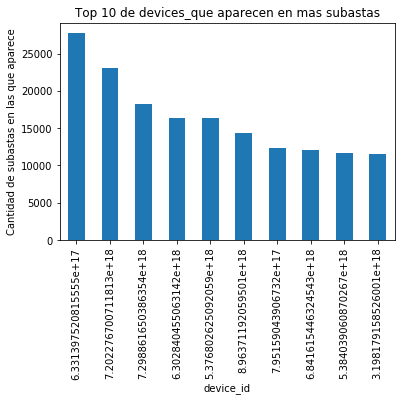

In [83]:
plt.title('Top 10 de devices_que aparecen en mas subastas')
plt.xlabel('device_id')
plt.ylabel('Cantidad de subastas en las que aparece')
top10.plot(kind = 'bar')